In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


#############################################2.(b)#############################################
h = 0.1 #step size
N = 10
D = 1
# The relation is that h = L/N, grid points are N+1
Omega_h = np.linspace(0,1,N+1)
Omega_h

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

[ 200. -100.    0.    0.    0.    0.    0.    0.    0.]
[-100.  200. -100.    0.    0.    0.    0.    0.    0.]
[   0.    0.    0.    0.    0.    0.    0. -100.  200.]


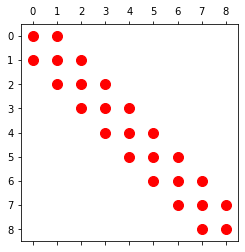

In [2]:
#############################################2.(d)#############################################
def FDL1D(N,L):  #construct finite difference laplacian operator 1 D
    FDL1 = -1*np.ones(N-2)
    FDL0 = 2*np.ones(N-1)
    matrix =(1/(L/N)**2)*(np.diag(FDL1,k =1)+np.diag(FDL0,k=0)+np.diag(FDL1,k =-1))
    return matrix 
L_op = FDL1D(N,1)
print(L_op[0,:])
print(L_op[1,:])
print(L_op[N-2,:])
plt.spy(L_op,marker='o',color='red')
# plt.show()



Numerical eigenvalues are: [  9.78869674  38.19660113  82.44294954 138.19660113 200.
 390.21130326 361.80339887 261.80339887 317.55705046]
Numerical eigenvectors are: [[ 1.38196601e-01 -2.62865556e-01 -3.61803399e-01  4.25325404e-01
   4.47213595e-01  1.38196601e-01  2.62865556e-01  4.25325404e-01
   3.61803399e-01]
 [ 2.62865556e-01 -4.25325404e-01 -4.25325404e-01  2.62865556e-01
  -2.05187300e-16 -2.62865556e-01 -4.25325404e-01 -2.62865556e-01
  -4.25325404e-01]
 [ 3.61803399e-01 -4.25325404e-01 -1.38196601e-01 -2.62865556e-01
  -4.47213595e-01  3.61803399e-01  4.25325404e-01 -2.62865556e-01
   1.38196601e-01]
 [ 4.25325404e-01 -2.62865556e-01  2.62865556e-01 -4.25325404e-01
  -3.16438781e-16 -4.25325404e-01 -2.62865556e-01  4.25325404e-01
   2.62865556e-01]
 [ 4.47213595e-01 -3.21269062e-16  4.47213595e-01 -6.41104347e-16
   4.47213595e-01  4.47213595e-01 -3.78026876e-16 -7.73353632e-16
  -4.47213595e-01]
 [ 4.25325404e-01  2.62865556e-01  2.62865556e-01  4.25325404e-01
   2.6568758

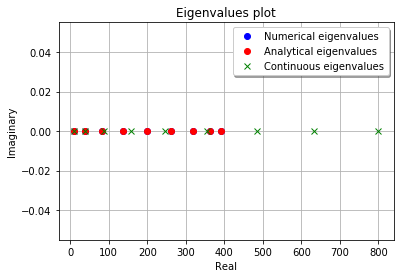

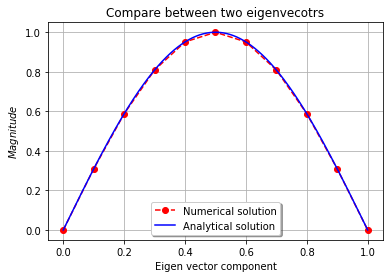

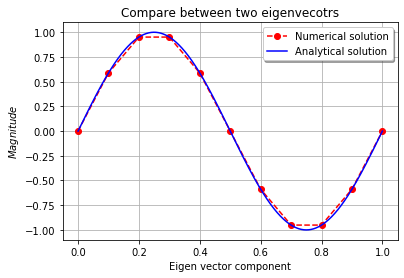

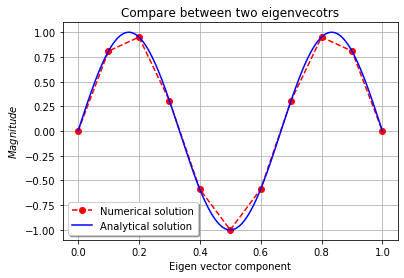

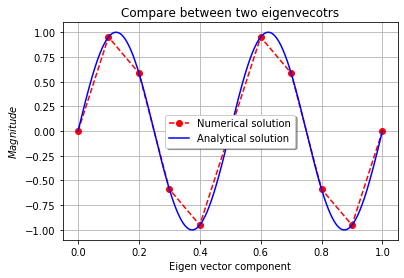

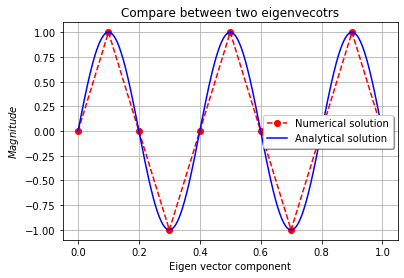

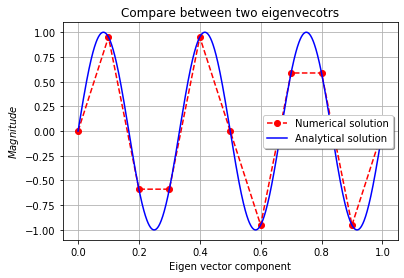

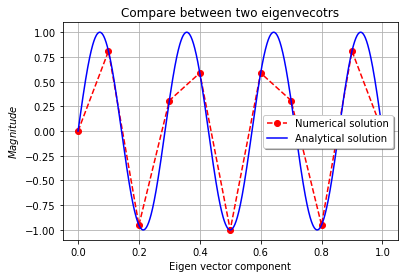

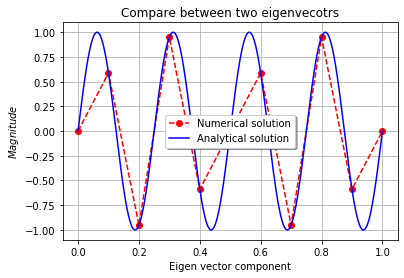

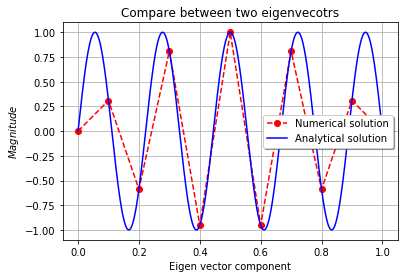

In [3]:
###########################################2.(e)###########################################
#Numerical solution
w, v =np.linalg.eig(L_op)
print("Numerical eigenvalues are: " +str(w))
print("Numerical eigenvectors are: " +str(v))

#Analytical solution
sn  =1000      #sample number for analaytical solution 
ij = np.zeros((9,sn))
for i in range(0,9):
    ij[i,:] = (i+1)*np.linspace(0,10,sn)
i = np.linspace(1,9,N-1)
eval_anal= 4/(h**2)*(np.sin(i*np.pi/2/N))**2
evec_anal = np.sin(np.pi*ij/N)

# print("Analytical eigenvalues are: " + str(eval_anal))
# print("Analytical eigenvectores are: "+str(evec_anal))

#Continuous problem eigenvector is the same
i1 = np.arange(1,N)
eval_tilde = (np.pi*i1/1)**2

#sort the numerical eigenvect and eigenval
windx = w.argsort()
sorted_w = w[windx]
sorted_v = v[:,windx]

#including BC for Numerical solution
sorted_v = np.insert(sorted_v,9,0,axis=0)   
sorted_v = np.insert(sorted_v,0,0,axis=0)

#plot of e-val
x2e = np.arange(1,N)
x2e = x2e*0
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Eigenvalues plot")
plt.plot(w.real, w.imag, 'bo', label = "Numerical eigenvalues")
plt.plot(eval_anal.real, eval_anal.imag, 'ro', label = "Analytical eigenvalues")
plt.plot(eval_tilde.real, eval_tilde.imag, 'gx', label = "Continuous eigenvalues")
plt.legend(loc="best",shadow=True)
plt.grid()
plt.show()
plt.close()

ratio = []
for i in range(0,9):
    ratio.append(np.sin((i+1)*np.pi/10)/sorted_v[1,i])     #ratio between the magnitude

def two_ev(y1,y2,sn,ratio):
    x2e = np.linspace(0,1,11)
    x2e1 = np.linspace(0,1,sn)
    plt.xlabel("Eigen vector component")
    plt.ylabel("$Magnitude$")
    plt.title("Compare between two eigenvecotrs")
    plt.plot(x2e, y1*ratio, 'ro--',label = "Numerical solution") 
    plt.plot(x2e1, y2, 'b-',label="Analytical solution")
    plt.legend(loc="best",shadow=True)
    plt.grid()
    plt.show()
    plt.close()
    
#############################################eigen vector plot#############################################
two_ev(sorted_v[:,0],evec_anal[0],sn,ratio[0])
two_ev(sorted_v[:,1],evec_anal[1],sn,ratio[1]) #the ratio included the sign value
two_ev(sorted_v[:,2],evec_anal[2],sn,ratio[2]) #the ratio included the sign value
two_ev(sorted_v[:,3],evec_anal[3],sn,ratio[3])
two_ev(sorted_v[:,4],evec_anal[4],sn,ratio[4])
two_ev(sorted_v[:,5],evec_anal[5],sn,ratio[5])
two_ev(sorted_v[:,6],evec_anal[6],sn,ratio[6])
two_ev(sorted_v[:,7],evec_anal[7],sn,ratio[7])
two_ev(sorted_v[:,8],evec_anal[8],sn,ratio[8])





In [4]:
xx =  (10**8 - np.sqrt(10**16-4))/2
xx

7.450580596923828e-09